# Alumno: Gerardo de Miguel González

1.- Crea una función que genere dos muestras que se distribuyen según dos gaussianas distintas. La función recibirá como valores de entrada: el número N de puntos a generar para cada categoría, y mu1, sigma1, mu2, sigma2 que son los correspondientes parámetros de las dos gaussianas. Como output devolverá un valor con longitud 2N que contenga la muestra x generada, y otro vector de longitud 2N que contenga 0 o 1 en función de la categoría asociada a ese elemento.

In [1]:
muestras <- function(n = 10,
                     mu_1 = 0,
                     sigma_1 = 1, 
                     mu_2 = 0,
                     sigma_2 = 1) {
    x_1 <- rnorm(n = n, mean = mu_1, sd = sigma_1)
    x_2 <- rnorm(n = n, mean = mu_2, sd = sigma_2)
    y_1 <- rep(0,length(x_1))
    #::GMG::http://www.cookbook-r.com/Basics/Making_a_vector_filled_with_values/
    y_2 <- rep(1, length(x_2))
    R <- t(cbind(rbind(x_1,y_1),rbind(x_2,y_2)))
    # https://stackoverflow.com/questions/32658793/how-to-remove-column-names-from-a-matrix-in-r
    colnames(R) <- NULL
    # http://www.cookbook-r.com/Manipulating_data/Randomizing_order/
    # http://r.789695.n4.nabble.com/Permuting-rows-of-a-matrix-td3298688.html
    return(R[sample(nrow(R)),])
}

In [2]:
# https://stats.stackexchange.com/questions/86285/random-number-set-seedn-in-r
set.seed(1)
Z <- muestras(n = 20)
dim(Z)
str(Z)
print(Z)

[1] 40  2

 num [1:40, 1:2] 0.9438 -1.4708 -0.0449 -0.6212 1.1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL
             [,1] [,2]
 [1,]  0.94383621    0
 [2,] -1.47075238    1
 [3,] -0.04493361    0
 [4,] -0.62124058    0
 [5,]  1.10002537    1
 [6,]  0.73832471    0
 [7,]  0.61982575    1
 [8,]  0.32950777    0
 [9,] -1.37705956    1
[10,]  0.38767161    1
[11,] -0.10278773    1
[12,]  0.18364332    0
[13,]  0.76317575    1
[14,] -1.98935170    1
[15,]  0.91897737    1
[16,]  0.59390132    0
[17,]  1.51178117    0
[18,] -0.30538839    0
[19,] -0.41499456    1
[20,] -0.39428995    1
[21,] -2.21469989    0
[22,]  0.48742905    0
[23,]  1.35867955    1
[24,] -0.01619026    0
[25,] -0.15579551    1
[26,]  1.59528080    0
[27,] -0.47815006    1
[28,]  0.82122120    0
[29,]  0.38984324    0
[30,] -0.05612874    1
[31,]  0.07456498    1
[32,] -0.05931340    1
[33,] -0.83562861    0
[34,]  1.12493092    0
[35,] -0.62645381    0
[36,] -0.82046838    0
[37,]  0.41794156    1
[38,]  0.78

2.- Crea una función que calcule el valor de la sigmoide para un valor de entrada Z. 

::GMG::https://helloacm.com/quick-r-tutorial-how-to-plot-sigmoid-function-using-r/

In [3]:
sigmoid = function(z) {
   1 / (1 + exp(-z))
}

In [4]:
# you can use the equal sign as well, the programmer way.
z <- seq(-5, 5, 0.01)

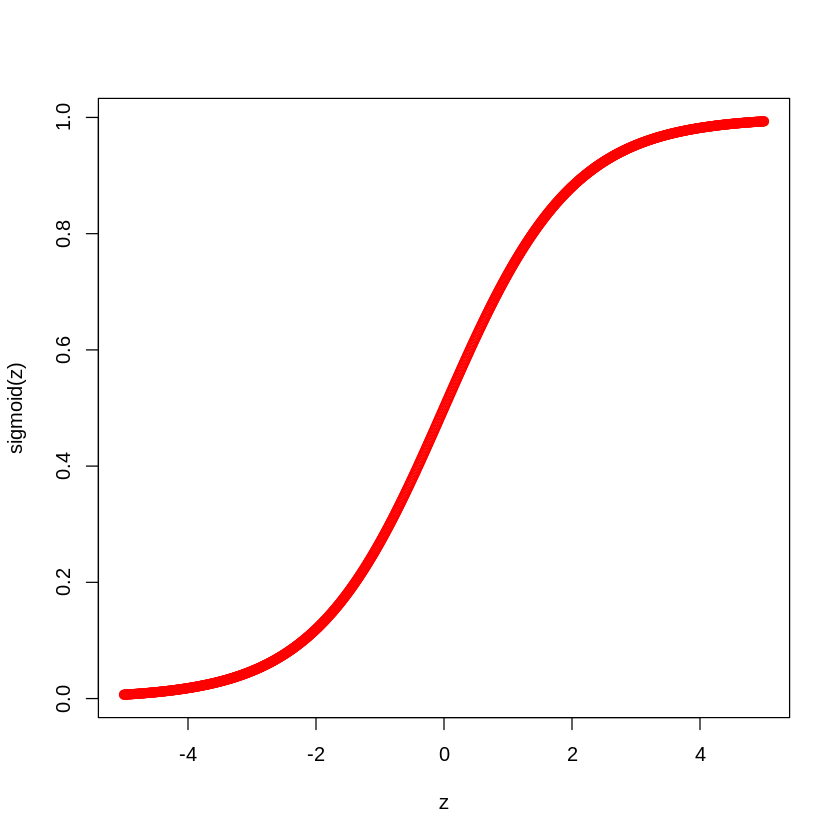

In [5]:
plot(z, sigmoid(z), col='red')

3.- Crea una función que calcule el valor de la función de Loss y que reciba como entrada “x” e “y” y los parámetros del modelo que vamos a asumir: z = a + b x (es decir, a y b). 

In [6]:
#::GMG::Función de coste de regresión logística con sigmoid
loss <- function(x,y,a,b) {
    (-1/length(y))*sum((y*log(sigmoid(z = a + b*x))) + 
               ((1-y)*log(1 - sigmoid(a + b*x))))
}

4.- Crea una función que devuelva el gradiente de la función de Loss y que reciba como entrada “x” e “y” y los parámetros (a, b) del modelo que vamos a asumir.

In [7]:
#::GMG::Uso una implementación en R del gradiente
#       f = función de loss
# https://rpubs.com/SeanPhan/OptimizationTest
# start grad
grad <- function(f, x, h = 1/8) { 
    n <- length(x) 
    gradient <- numeric(n) 
    dir <- diag(rep(1,n)) 
    for ( i in 1:n ) { 
        v <- dir[i,] # direction we move for derivative wrt x[i] 
        f.m2h <- f(x - 2*h*v) 
        f.mh <- f(x - h*v) 
        f.ph <- f(x + h*v) 
        f.p2h <- f(x + 2*h*v) # compute derivative using h 
        r1 <- (f.m2h - 8*f.mh + 8*f.ph - f.p2h)/(12*h) 
        f.mhdiv2 <- f(x - 0.5*hv) 
        f.phdiv2 <- f(x + 0.5*hv) # compute derivative using h/2 
        r2 <- (f.mh - 8*f.mhdiv2 + 8*f.phdiv2 - f.ph)/(6*h) # use one step of Richardson 
        gradient[i] <- (16*r2 - r1)/15 } 
    return(gradient) 
} 
# end grad

5.- Generar un par de vectores “x”, “y” con N = 100, mu1 = 2, mu2 = 6, sigma1 = 1 y sigma2 = 1.

In [8]:
# https://stats.stackexchange.com/questions/86285/random-number-set-seedn-in-r
set.seed(1)

In [9]:
Z <- muestras(n = 100, mu_1 = 2, mu_2 = 6, sigma_1 = 1, sigma_2 = 1)
dim(Z)
str(Z)

[1] 200   2

 num [1:200, 1:2] 5.41 1.61 5.57 6.79 6.52 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL


6.- Calcular la función de coste y el gradiente para (a = 0, b = 0). Actualizar los valores de a y b de manera que (a, b)_nuevos = (a, b)_viejos + lambda * gradiente. Repite 3 o 4 cuatro veces y observa los valores de la función de coste. Intenta encontrar el mínimo aproximadadamente. Interpreta los resultados.

In [ ]:
#::GMG::Pendiente